In [1]:
import sys
sys.path.append('/mnt/d/ariel2/code/core/')
sys.path.append('d:/ariel2/code/core/')
sys.path.append('/kaggle/input/my-ariel2-library')
import kaggle_support as kgs
import ariel_model
import ariel_numerics
import ariel_gp
import ariel_load
import time
import numpy as np
import multiprocess
import importlib
import copy
import cupy as cp
import matplotlib.pyplot as plt
from tqdm import tqdm

local


In [5]:
train_data = kgs.load_all_train_data()
test_data = kgs.load_all_test_data()
kgs.debugging_mode = 1

(1, 282)
(1, 282)


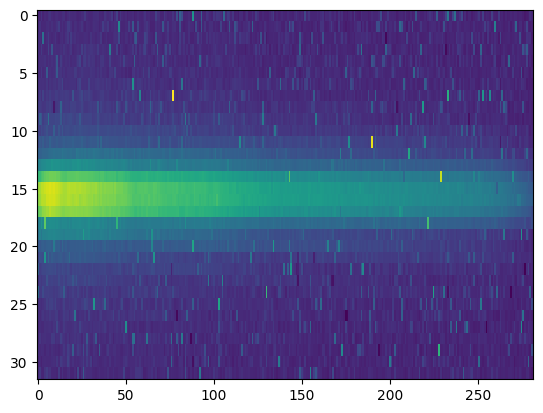

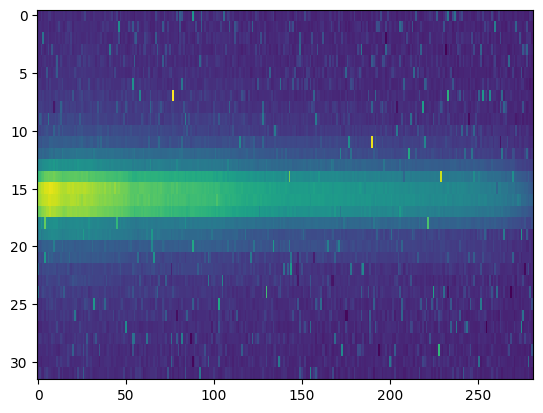

In [7]:
importlib.reload(ariel_load)
for d in test_data:
    d = copy.deepcopy(d)
    loaders = ariel_load.default_loaders()
    loaders[0].cache_steps = []
    for ii in range(2):    
        loaders[ii].apply_full_sensor_corrections.use_pca_for_background_removal = True
    loaders[1].apply_full_sensor_corrections.remove_background_n_rows = 8
    loaders[0].apply_full_sensor_corrections.remove_background_based_on_pixels = True
    loaders[1].apply_full_sensor_corrections.remove_background_based_on_rows = True
    loaders[0].apply_wavelength_binning = ariel_load.ApplyWavelengthBinning2()
    loaders[0].apply_wavelength_binning.options.n_components = 4
    d.load_to_step(0,loaders)
    d.load_to_step(5,loaders)
    plt.pause(0.001)

In [4]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.
